In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
def V_vdw(eps:"2molecules"=[0.5,0.27], sigma:"2molecules"=[0.1,0.2],r:float=0.12):
    effective_eps, effective_sigma = np.sqrt(np.prod(eps)), np.mean(sigma)
    C6 = (effective_sigma/r)**6
    return 4*effective_eps*((C6)**2-C6)

Text(0.5, 0, 'R / nm')

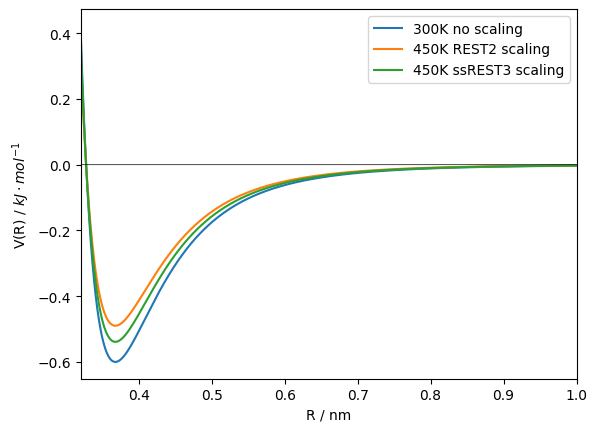

In [13]:
# atom   sigma ,  epsilon
wat_O = [3.15365e-01,9.98989e-01]
prot_CA = [3.39967e-01,3.59824e-01]
sigma, eps = np.stack([prot_CA,wat_O]).T

scalefac_K = np.array([1,1.1])
scalefac_L = np.array([1, 300/450])
R=np.linspace(0.32,1, 10000)

plt.plot(R,V_vdw(eps=eps,sigma=sigma,r=R), label="300K no scaling")
plt.plot(R,V_vdw(eps=eps*scalefac_L,sigma=sigma,r=R), label="450K REST2 scaling")
plt.plot(R,V_vdw(eps=eps*scalefac_K**2*scalefac_L,sigma=sigma,r=R), label="450K ssREST3 scaling")
plt.plot(R,np.zeros_like(R), c='k', linewidth=0.5)
plt.legend()
plt.xlim(R[0],R[-1])
plt.ylabel("V(R) / $kJ \cdot mol^{-1}$")
plt.xlabel('R / nm')

Text(0.5, 0, 'R / nm')

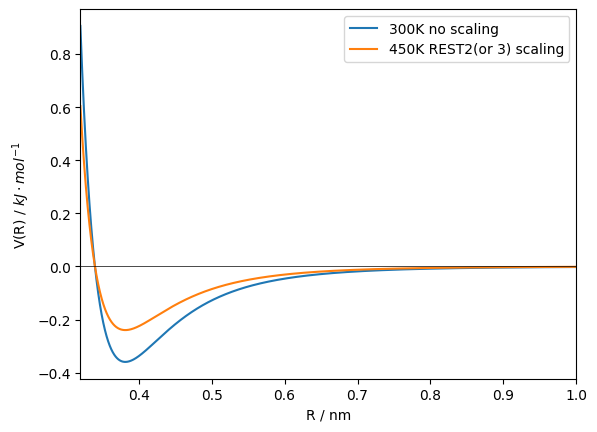

In [14]:
prot_CA = [3.39967e-01,3.59824e-01]
sigma, eps = np.stack([prot_CA,prot_CA]).T

plt.plot(R,V_vdw(eps=eps,sigma=sigma,r=R), label="300K no scaling")
plt.plot(R,V_vdw(eps=eps*scalefac_L**2,sigma=sigma,r=R), label="450K REST2(or 3) scaling")
plt.plot(R,np.zeros_like(R), c='k', linewidth=0.5)
plt.legend()
plt.xlim(R[0],R[-1])
plt.ylabel("V(R) / $kJ \cdot mol^{-1}$")
plt.xlabel('R / nm')

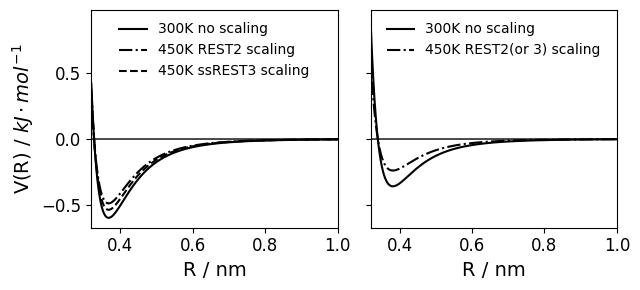

In [44]:
# atom   sigma ,  epsilon
wat_O = [3.15365e-01,9.98989e-01]
prot_CA = [3.39967e-01,3.59824e-01]
sigma, eps = np.stack([prot_CA,wat_O]).T

scalefac_K = np.array([1,1.1])
scalefac_L = np.array([1, 300/450])
R=np.linspace(0.32,1, 10000)

fig, axes = plt.subplots(1,2, sharey=True, figsize=(6.5,3), linewidth=2)
(ax1, ax2) = axes.flatten()

ax1.plot(R,V_vdw(eps=eps,sigma=sigma,r=R), label="300K no scaling", linestyle='-', c='k')
ax1.plot(R,V_vdw(eps=eps*scalefac_L,sigma=sigma,r=R), label="450K REST2 scaling", linestyle='-.', c='k')
ax1.plot(R,V_vdw(eps=eps*scalefac_K**2*scalefac_L,sigma=sigma,r=R), label="450K ssREST3 scaling", linestyle='--', c='k')
ax1.plot(R,np.zeros_like(R), c='k', linewidth=1)
ax1.legend(loc='upper center', frameon=False)
ax1.set_xlim(R[0],R[-1])
ax1.set_ylabel("V(R) / $kJ \cdot mol^{-1}$", fontsize=14)
ax1.set_xlabel('R / nm', fontsize=14)
ax1.tick_params(axis='both', labelsize=12)

prot_CA = [3.39967e-01,3.59824e-01]
sigma, eps = np.stack([prot_CA,prot_CA]).T

ax2.plot(R,V_vdw(eps=eps,sigma=sigma,r=R), label="300K no scaling", linestyle='-', c='k')
ax2.plot(R,V_vdw(eps=eps*scalefac_L**2,sigma=sigma,r=R), label="450K REST2(or 3) scaling", linestyle='-.', c='k')
ax2.plot(R,np.zeros_like(R), c='k', linewidth=1)
ax2.legend(loc='upper center', frameon=False)
ax2.set_xlim(R[0],R[-1])
ax2.set_xlabel('R / nm', fontsize=14)
ax2.tick_params(axis='both', labelsize=12)
fig.tight_layout()
fig.savefig('fig_a.svg', dpi=300)
fig.savefig('fig_a.png', dpi=300)